# Numpy TP3

#### Monday,  October 12, 2020

## Linear Algebra

Given three 2-D matrices (A, B and C) and two vectors (V and W)

$$
A = \begin{bmatrix}
1 &  2 & 3\\ 
4 & -5 & 6 \\ 
7 &  8 & 9 \\
\end{bmatrix} \quad ; \quad
B = \begin{bmatrix}
1 &  2 & 3\\ 
-4 & -5 & -6 \\ 
7 &  8 & 9 \\
\end{bmatrix} \quad ; \quad
C = \begin{bmatrix}
1 &  2 & 3\\ 
4 & -5 & 6 \\ 
7 &  8 & 9 \\
0 &  1 & -2 \\
\end{bmatrix} 
$$

$$
V = \begin{bmatrix}
2 & 4 & -10  \\
\end{bmatrix}\quad ; \quad
W = \begin{bmatrix}
2 \\ 
4  \\ 
-10  \\
\end{bmatrix} 
$$

In [1]:
import numpy as np
plt.rcParams["figure.figsize"] = (12,6)

NameError: name 'plt' is not defined

### Numpy array constructor

In [2]:
# create the 2-D matrices: a, b and the vectors v and w
# Matrices
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A[1,1] = - A[1,1]

B = A
B[1,:] = - A[1,:]
B[1,1] = - B[1,1]

# Vectors
v = np.array([[2,   4,   -10]])
w = np.array([[2], [4], [-10]])

# print them
print(A)
print(B)

print(v)
print(w)              


[[ 1  2  3]
 [-4 -5 -6]
 [ 7  8  9]]
[[ 1  2  3]
 [-4 -5 -6]
 [ 7  8  9]]
[[  2   4 -10]]
[[  2]
 [  4]
 [-10]]


In [3]:
# verify the shape of a, v and w
print(A.shape, v.shape, w.shape)

(3, 3) (1, 3) (3, 1)


In [4]:
# verify the data type of a
print(A.dtype)

int32


### Element-wise and matrix operations

In [16]:
# analyse the differences between
# v*w
r1 = v*w

# np.dot(v,w)
r2 = np.dot(v,w)

# np.dot(w,v)
r3 = np.dot(w,v)

# Displaying results
print(r1)
print(r2)
print(r3)

[[  4   8 -20]
 [  8  16 -40]
 [-20 -40 100]]
[[120]]
[[  4   8 -20]
 [  8  16 -40]
 [-20 -40 100]]


Two of the calculations provide the usual matrix multiplication.
One is therfore the scalar product, whil the other are matrices multiplications.

Therefore, the product * works as the usual product sign
The np.dot function however works either as a a scalar product or a matriw multiplication. 

In [6]:
# analyse the differences between
# a*b
r1 = A*B

# np.dot(a,b)
r2 = np.dot(A,B)

# Displaying results
print(r1)
print(r2)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 14  16  18]
 [-26 -31 -36]
 [ 38  46  54]]


Quiet naturally, we see that the * sign acts as for matrice multiplicaton that one could obtain by hand, while the np.dot function multiply only element at a position by element at the same position.

In [7]:
# create the 2-D matrix: c
C = np.array([[1,2,3],[4,-5,6],[7,8,9],[0,1,-2]])

# compute b . c and c . b
#r1 = np.dot(B,C)
r2 = np.dot(C,B)

# Displaying results
#print(r1)
print(r2)

[[ 14  16  18]
 [ 66  81  96]
 [ 38  46  54]
 [-18 -21 -24]]


Matrices' shape are such that the matrix product between C (4x3) and B(3x3) isnt' possible.
The inverse is though.

In [8]:
# take the three uppe lines of matrix c to compute b . c
print("B . C[0:3,:] = ", np.dot(B, C[0:3,:]))

B . C[0:3,:] =  [[ 30  16  42]
 [-66 -31 -96]
 [102  46 150]]


### Solving a linear system with linalg from scipy

In [9]:
# import linalg and print the manual for linalg
from scipy import linalg as algl

algl?

In [10]:
# solve a x = w
x = algl.solve(A, w)

print(x)

[[ 0.2]
 [-8.4]
 [ 6.2]]


<ipython-input-10-ad88e37a0c27>:2: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = algl.solve(A, w)


In [11]:
# solve a x = v (do not hesitate to take a transpose if necessary)
x = algl.solve(A, v.T)

print(x)

[[ 0.2]
 [-8.4]
 [ 6.2]]


<ipython-input-11-67bf1c39a215>:2: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = algl.solve(A, v.T)


In [12]:
# Compute the inverse of a to solve a x = v 

x = np.dot(algl.inv(A), v.T)

print(x)

[[-1.]
 [-6.]
 [ 3.]]


### Execution CPU time

In [13]:
# create a random vector av of length N=10 using np.random.random

N = 10

# np.random?
av = np.random.random(N)

# verify the length, the shape and the type of av

len(av)
print(av.shape, type(av[0]))

(10,) <class 'numpy.float64'>


In [14]:
# create a function mysum which sums all vector's elements of av

In [15]:
def mysum(av):
    """
     The function mysum adds up arbitrary
     number form av to restitute the sum of it
     sum : float
    """
    sum = 0
    for i in range(np.size(av)):
        sum += av[i]
    return(sum)

r1 = mysum(av)

# Displaying results
print(r1)

4.566288384868043


In [16]:
# import the time function from the time library
from time import time

#time?
# using time function, compare the executing time of
# mysum and np.sum 

print("Time for mysum to execute = ".format(mysum(av)))
print("Time for np.sum to execute = ".format(np.sum(av)))

Time for mysum to execute = 
Time for np.sum to execute = 


In [17]:
# create a random vector av(N) of length N=1e5 
# for N=10, 1e3, 1e5, 1e6, 1e7, 1e8 ... depending the processors (CPU) performances of your laptop.

N  = int(1e8)
av = np.random.random(N)

# compute the execution time
t  = time()    # time before calculation
s  = np.sum(av) # time after calculation (it registers the time nedded to do the calculation)
t1 = time() - t
print(s)

print("optimized python function np.sum", t1, "secondes")

# ------------------------------------------------------------------

t  = time()    # time before calculation
s  = mysum(av) # time after calculation (it registers the time nedded to do the calculation)
t2 = time() - t
print(s)

print("optimized python function mysum", t1, "secondes")

# ------------------------------------------------------------------

# calculate the flops (floating point operations per second) for the addition 
print("+", "{:.2%}".format((t2 - t1)/t1))
print("mysum flops", '{:03.2g}'.format(N/t2), 'for "+"')

49998224.606517315
optimized python function np.sum 0.11968040466308594 secondes
49998224.606520444
optimized python function mysum 0.11968040466308594 secondes
+ 20497.51%
mysum flops 4.1e+06 for "+"


In [25]:
N = int(1e3) # +2 accounts for the limits
av = np.random.random(N)
diff = np.zeros(N)
t = time()
for j in range(1, N-1): # to not be out of the table's limits
    diff[j] = av[j+1] - av[j-1]
t1 = time() - t

print("time", t1, "secondes")

# ------------------------------------------------------------------

# print the last non-zero value of the vector diff

print("diff(N-2) = ", diff[N-2])

time 0.0010368824005126953 secondes
diff(N-2) =  0.005403100750997258


In [40]:
t = time()
diff[1:-1] = av[2:] - av[:-2]
t2 = time() - t

print("time", t2, "secondes")
print("diff(N-2) = ", diff[N-2])
print("element-wise against vectorized loop : ", '{:.2%}'.format((t1-t2)/t2))

time 0.0 secondes
diff(N-2) =  0.005403100750997258


ZeroDivisionError: float division by zero

### Estimating $\pi$ using the Monte Carlo Method

In [41]:
# create a random matrix ([x,y]) of dimension 2 and length N = 1e3

N = int(10)

# random matrix
([x,y]) = np.random.random((2, N))
print(x, y)

[0.84258652 0.73679816 0.56599522 0.62949724 0.07633064 0.34477776
 0.40744248 0.90761223 0.22894331 0.52482835] [0.86301036 0.47587134 0.7577127  0.58901657 0.08174201 0.44374842
 0.43562316 0.83219544 0.18876095 0.07591067]


In [42]:
# count the points inside of the 1/4 circle of radius 1 and center (0,0)

# center
x0, y0 = [0, 0]

# angle
theta = np.linspace(0, 2*np.pi/4, 100)

# radius
r = 1

# circle equation
xx = r*np.cos(theta)
yy = r*np.sin(theta)

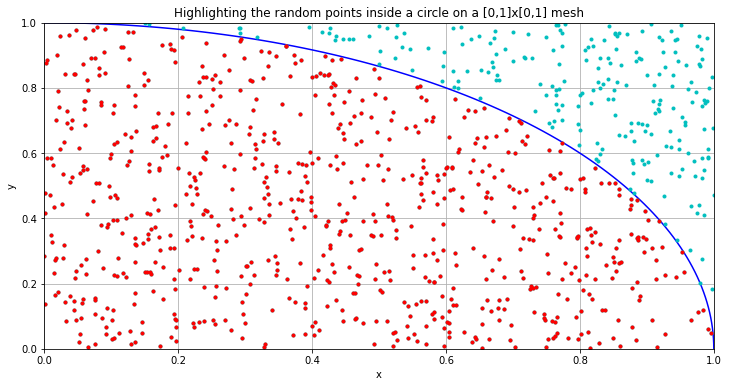

There are  773 + 773 = 1546 points inside the circle


In [146]:
import matplotlib.pyplot as plt

N = int(1e3)

# random matrix
([x,y]) = np.random.random((2, N))

# -----------------------------------------------------------------

# ploting circle
p1 = plt.plot(xx, yy, 'b-')

# conditions c to differentiate points inside the circle from points outside of it
c = (x**2 + y**2) < r**2

# random points & circle altogether
plt.plot(x, y, 'c.')       # putting every points in red
plt.plot(x[c], y[c], 'r.') # hihlighting the points inside the circle

plt.title('Highlighting the random points inside a circle on a [0,1]x[0,1] mesh')
plt.xlabel('x')
plt.ylabel('y')

plt.grid('True')

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()
plt.close()

# -----------------------------------------------------------------

inside_x = len(x[c])
inside_y = len(y[c])
inside_total = inside_x + inside_y

print("There are ", str(inside_x), "+", str(inside_y), "=", str(inside_total),"points inside the circle")

In [147]:
# compute the ratio of the points within the circle to the total number of points

total_point = len(x) + len(y)

print("There are", str(inside_total), "points inside and ", str(total_point), "in total, thus a ratio inside/outside is equal to", '{:.2}'.format(inside_total/total_point))

print("Real value of pi/4 = ", np.pi/4)

There are 1546 points inside and  2000 in total, thus a ratio inside/outside is equal to 0.77
Real value of pi/4 =  0.7853981633974483


We see that we are able to get an approximation of $\pi$ through this method.

In [148]:
def calculPi(N, r):
    n = np.array(np.dot(np.arange(1, 10), N))
    pi_arr = np.zeros(np.size(n))

    for i in range(np.size(n)):
        
        # random matrix
        ([x,y]) = np.random.random((2, n[i]))
        
        # conditions c to differentiate points inside the circle from points outside of it
        c = (x**2 + y**2) < r**2

        inside_x = len(x[c])
        inside_y = len(y[c])
        inside_total = inside_x + inside_y

        total_point = len(x) + len(y)
                
        pi_arr[i] = inside_total/total_point
    return (n, pi_arr)

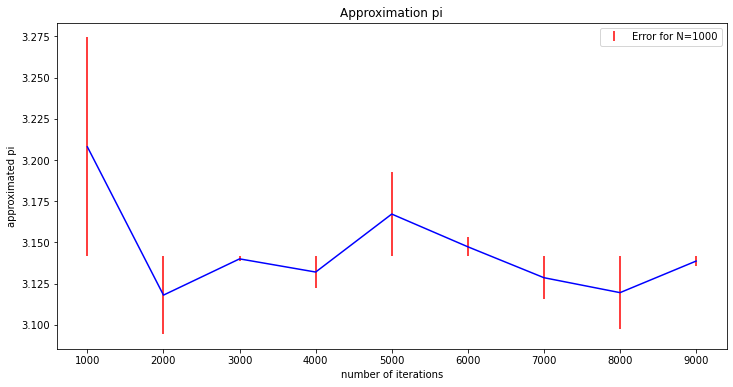

In [163]:
# write a function calculPi(N) that returns two vectors (n,pi_arr(n)) 
# with n=[1:N] and pi_arr an approximation of pi

N = int(1e3)

# ----------------------------------------------------------

# Complete circle
# center
x0, y0 = [0, 0]

# angle
theta = np.linspace(0, 2*np.pi/4, 100)

# radius
r = 1

# circle equation
xx = r*np.cos(theta)
yy = r*np.sin(theta)

#plt.plot(xx, yy)

# -----------------------------------------------------------------

n, pi_arr = calculPi(N, r)

plt.plot(n, 4*pi_arr, 'b-')

plt.title('Approximation pi')
plt.xlabel('number of iterations')
plt.ylabel('approximated pi')

plt.errorbar(n, 4*pi_arr, np.pi - 4*pi_arr, fmt = 'none',ecolor = 'red',label='Error for N=1000')

plt.legend()

plt.show()
plt.close()

## Introduction to sparse matrix

Given the sparse matrices (A) 

$$
A = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0\\ 
0 & 0 & 2 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 2 & 0 & 0 \\
\end{bmatrix}
$$

In [186]:
# Sparse matrices contain only a few non-zero values 
# to save space, we use sparse matrix by comparing with dense matrix.

# import sparse library from scipy
from scipy import sparse

# create a dense matrix A, and print A
A = np.zeros([3,6], dtype = int)
A[0,0] = A[1,5] = 1
A[1,2] = A[2,3] = 2

print(A)

[[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [187]:
# convert A to a sparse matrix representation (S) using the function csc_matrix from scipy
# explore the contain of the new matrix with S.data
S = sparse.csc_matrix(A)

print(S.data)

[1 2 2 1]


In [191]:
# Use S.todense to retrieve A

A = sparse.csc_matrix.todense(S)

# print the result
print(A)

[[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


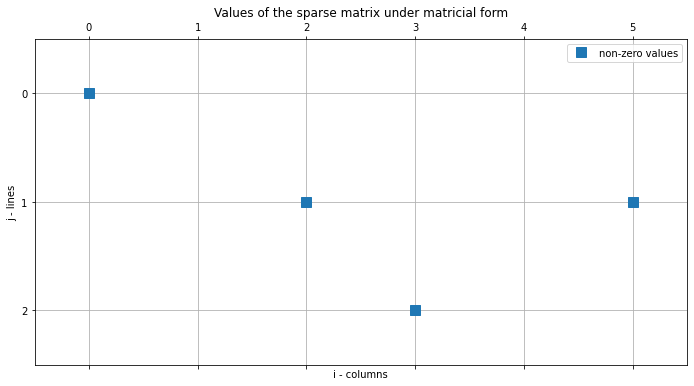

In [196]:
# Do a graph  with S, using plt.spy
plt.spy(S, label = 'non-zero values')

plt.title('Values of the sparse matrix under matricial form')
plt.xlabel('i - columns')
plt.ylabel('j - lines')

plt.legend()

plt.grid('True')

In [ ]:
We get a visual representation of S (the sparse matrix), that recalls the one of our initial matrix,
just that only the non-zero values appear.

# Take a look at
https://docs.scipy.org/doc/scipy/reference/sparse.html